In [ ]:
### Donald Bango
### ANN Model
### 22 May 2024
### Dr. Ali Wahid

## Title:

NFL Play Statistics dataset (primary)

## Link to Dataset:

https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present

## Dataset Description:

The NFL dataset provides a comprehensive view of various aspects of NFL games, including statistics, player participation, annual NFL combine data, and NFL draft information. This dataset spans NFL play data from 2004 to the 2019 season, with detailed records for each play, player, coach, and game official. It includes data tables for the NFL Draft from 1989 to present, NFL Combine from 1999 to present, NFL rosters from 1998 to present, NFL schedules, stadium information, and many more box score, player statistics, and game statistics. The details of NFL statistics varies by season, with detailed data collection starting from 2012

## Problem Statement:

The NFL is one of the most popular sports leagues in the world, and fans, analysts, and coaches alike seek to understand the performance and characteristics of players to build optimal teams. This project aims to address the problem of selecting the most optimal NFL team by leveraging advanced data analytics and machine learning techniques.

The objective is to build a deep artificial neural network (ANN), specifically a multilayer perceptron (MLP), to predict the optimal NFL team composition from a pool of 200 active and 200 retired players based on their performance statistics. The optimal team will consist of 33 players: 11 for offense, 11 for special teams, and 11 for defense. This research aims to showcase the effectiveness of MLPs in identifying top-performing players and optimizing team selection in professional sports.

## Why Use ANNs for NFL Player Classification?:

Artificial Neural Networks (ANNs) are well-suited for the task of NFL player classification due to their ability to capture complex, non-linear relationships within large and diverse datasets. ANNs excel at pattern recognition, enabling them to effectively analyze various player statistics and performance metrics to predict optimal team compositions. The multilayer perceptron (MLP) architecture, with its multiple hidden layers and activation functions, allows the model to learn intricate features and interactions that simpler models might miss. Additionally, ANNs can handle high-dimensional data and can be fine-tuned through backpropagation and optimization techniques, leading to improved predictive accuracy and generalization capabilities. This makes ANNs a powerful tool for selecting the best NFL players based on their comprehensive performance data.

## Key Questions for NFL Player Classification Using ANN:

- Can the ANN model accurately identify and differentiate between optimal and non-optimal NFL players from the dataset?

- How does the model perform when predicting the optimal team from a new pool of players compared to the training data?

- How does the model’s output assist in interpreting and selecting the optimal football team from the given dataset?

## Algorithm of the Solution:

1. **Load Libraries:**
   - Import the necessary Python libraries such as pandas, numpy, scikit-learn, TensorFlow, Keras, and matplotlib.

2. **Import Dataset:**
   - Download the "NFL Players Dataset" from Kaggle.
   - Load the dataset into pandas DataFrames.

3. **Exploratory Data Analysis (EDA) and Preprocessing:**
   - Print out the columns to understand the structure.
   - Handle missing values and assess outliers.
   - Fill NA values.
   - Explore data distributions for relevant stats. 
   - Standardize the features.

4. **Select a Pool of Players:**
   - Select a random pool of 200 active and 200 retired players based on the age criteria (e.g., below 35 years for active players).

5. **Define Optimal Team:**
   - Define the optimal team criteria for offense, special teams, and defense.
   - Aggregate relevant statistics for players to calculate their performance scores.
   - Select the top 11 players for each team based on the calculated scores.

6. **Identify Optimal Team Players:**
   - Identify and list the players selected for the optimal team from the pool.

7. **Build the MLP Model:**
   - Define the input features and target variable.
   - Split the data into training (80%) and testing (20%) sets.
   - Build and compile the deep artificial neural network (MLP).
   - Train the model.

8. **Activate the MLP:**
   - Forward propagate the patterns of the training data through the network to generate an output.
   - Based on the network's output, calculate the error that we want to minimize using a cost function.
   - Backpropagate the error, find its derivative with respect to each weight in the network, and update the model.
   - Repeat steps 1 through 3 for multiple epochs to learn the weights of the MLP.
   - Use forward propagation to calculate the network output
   - Apply a threshold function to obtain the predicted class labels in the one-hot representation (one-hot represenation is most likely not necessary).
   - Interpret the output in the context of selecting an optimal football team.

9. **Evaluate Model Performance:**
   - Evaluate the model using metrics such as accuracy and loss.
   - Plot training and validation accuracy and loss graphs.

10. **Predict Optimal Team from New Pool:**
    - Select a new pool of 400 players (200 active, 200 retired).
    - Use the trained model to predict which players from this new pool would make up the optimal team.
    - Interpret the model’s predictions.

11. **Technical Report:**
    - Document the process in a Python notebook.
    - Include analysis of the findings, and references.

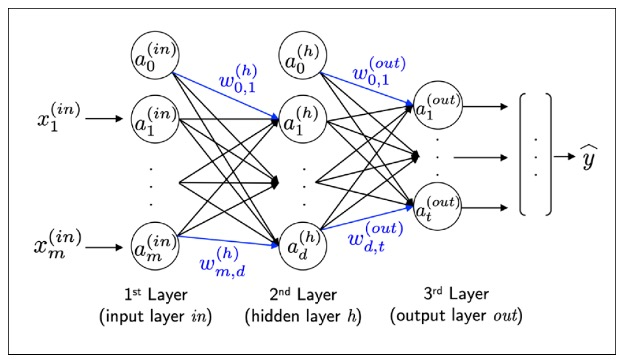

In [68]:
from IPython.display import Image, display
# An Artificial Neural Network Model Image

# Path to the image
image_path = '/Users/don/downloads/Picture1.jpg'

# Display the image
display(Image(filename=image_path))

An Artificial Neural Network Model. Reprinted from Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2 (3rd ed.), by Raschka, S. and Mirjalili, V., 2019, p. 388, Packt Publishing

***Loading Data, Feature Extraction and Merging, Classifying players by age and position, Standardize, Data, Parsing***

In [127]:
#Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping



In [70]:
import pandas as pd

# Directory path
directory = '/Users/don/Downloads/archive_2'

# List of filenames
filenames = [
    'combine.csv',
    'draft.csv',
    'fumblForced.csv',
    'fumbles.csv',
    'gameParticipation.csv',
    'games.csv',
    'interceptions.csv',
    'kickReturns.csv',
    'kicks.csv',
    'officials.csv',
    'passDef.csv',
    'passer.csv',
    'penalties.csv',
    'players.csv',
    'plays.csv',
    'qhHits.csv',
    'receiver.csv',
    'rusher.csv',
    'sacks.csv',
    'tackles.csv'
]

# Dictionary to store the dataframes
dataframes = {}

# Load each CSV file into a dataframe and store it in the dictionary
for filename in filenames:
    df_name = filename.split('.')[0]  # Use the base name without '_df'
    dataframes[df_name] = pd.read_csv(f'{directory}/{filename}')





In [72]:
# Dataframe columns
#for df in dataframes:
#    print(dataframes[df].columns)

Many of the columns in the files contain `playerId`, which allows for merging of data across different tables.

In [54]:
# Check for missing data
def check_missing_data(players_df):
    missing_data = players_df.isnull().sum().reset_index()
    missing_data.columns = ['Feature', 'MissingValues']
    return missing_data

for df in dataframes:
    mdf = dataframes[df]
    rdf = check_missing_data(mdf)
#    print(df)
#    print(mdf.shape)
#    print(rdf)

In [60]:
for df in dataframes:
    mdf = dataframes[df]
    rdf = check_missing_data(mdf)
#    print(df)
#    print(mdf.shape)
#    print(rdf)

In [61]:
dataframes['kicks'].head(3)

,kickId,playId,teamId,playerId,kickPosition,kickType,kickOutcome,kickInside20,kickOnside,kickOwnRecovery,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickNull
0,300001,1,3200,19960452,K,kickoff,returned,1,0,0,72.0,17,55.0,0,0
1,300002,7,3800,19940992,P,punt,returned,1,0,0,41.0,5,36.0,0,0
2,300003,15,3200,19940450,P,punt,touchback,0,0,0,53.0,0,53.0,0,0


In [74]:
# Use 'players.csv' DataFrame
players = dataframes['players']

# Extract important features from each dataset and add to the players DataFrame
combine_features = dataframes['combine'][['playerId', 'combineHeight', 'combineWeight', 'combine40yd', 'combineBench', 'combineVert', 'combineShuttle', 'combineBroad', 'combine3cone']]
players = players.merge(combine_features, on='playerId', how='left')

# Add draft features
draft_features = dataframes['draft'][['playerId', 'round', 'pick', 'draftTradeValue']]
players = players.merge(draft_features, on='playerId', how='left')

# Add forced fumble features
fumbl_forced_features = dataframes['fumblForced'][['playerId', 'fumForcedTurnover']]
players = players.merge(fumbl_forced_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Add fumble features
fumbles_features = dataframes['fumbles'][['playerId', 'fumTurnover']]
players = players.merge(fumbles_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Add game participation features
game_participation_features = dataframes['gameParticipation'][['playerId', 'gamePartSnapCount']]
players = players.merge(game_participation_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')



# Display the merged dataframe
pd.set_option('display.max_columns', None)
players.head(3)



,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount
0,19770001,Ricky,Bell,Ricky Bell,RB,90089,2509366,NaN,USC,74.0,220.0,1955-04-08,22.084932,http://www.nfl.com/player/RickyBell/2509366/pr...,Houston,TX,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3000.0,NaN,NaN,NaN
1,19770002,Tony,Dorsett,Tony Dorsett,RB,15260,2513084,NaN,Pittsburgh,71.0,192.0,1954-04-07,23.087671,http://www.nfl.com/player/TonyDorsett/2513084/...,Rochester,PA,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2600.0,NaN,NaN,NaN
2,19770003,Eddie,Edwards,Eddie Edwards,DE,33124,2513479,NaN,Miami (FL),77.0,256.0,1954-04-25,23.038356,http://www.nfl.com/player/EddieEdwards/2513479...,Sumter,SC,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2200.0,NaN,NaN,NaN


In [75]:
# Interception features
interceptions_features = dataframes['interceptions'][['playerId', 'int', 'intYards', 'intTd','intPosition']]
players = players.merge(interceptions_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Kick return features
kick_returns_features = dataframes['kickReturns'][['playerId', 'kickRetYds', 'kickRetTd', 'kickRetEnd','kickRetPosition']]
players = players.merge(kick_returns_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Kick features
#kickOutcome	kickInside20	kickOnside	kickOwnRecovery
kicks_features = dataframes['kicks'][['playerId', 'kickLength', 'kickReturnYds', 'kickNetYds', 'kickReturnTd','kickInside20','kickOnside','kickOwnRecovery']]
players = players.merge(kicks_features.groupby('playerId').mean().reset_index(), on='playerId', how='left')

# Pass defense features
pass_def_features = dataframes['passDef'][['playerId', 'passDefNull']]
players = players.merge(pass_def_features.groupby('playerId').count().reset_index().rename(columns={'passDefNull': 'passDefCount'}), on='playerId', how='left')

# Passer features
passer_features = dataframes['passer'][['playerId', 'passComp', 'passTd', 'passInt', 'passSack', 'passSackYds']]
players = players.merge(passer_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Penalty features
penalties_features = dataframes['penalties'][['playerId', 'penaltyYds']]
players = players.merge(penalties_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Quarterback hit features
qh_hits_features = dataframes['qhHits'][['playerId', 'statNull']]
players = players.merge(qh_hits_features.groupby('playerId').count().reset_index().rename(columns={'statNull': 'qhHitCount'}), on='playerId', how='left')

# Receiver features
receiver_features = dataframes['receiver'][['playerId', 'recYards', 'rec', 'recYac', 'rec1down', 'recFumble', 'recPassDef', 'recPassInt']]
players = players.merge(receiver_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Rusher features
rusher_features = dataframes['rusher'][['playerId', 'rushYards', 'rushTd', 'rushDirection']]
players = players.merge(rusher_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Sack features
sacks_features = dataframes['sacks'][['playerId', 'sackYards']]
players = players.merge(sacks_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

# Tackle features
tackles_features = dataframes['tackles'][['playerId', 'tackleYdsScrim']]
players = players.merge(tackles_features.groupby('playerId').sum().reset_index(), on='playerId', how='left')

In [76]:
# Display the merged dataframe
players.head(3)

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim
0,19770001,Ricky,Bell,Ricky Bell,RB,90089,2509366,NaN,USC,74.0,220.0,1955-04-08,22.084932,http://www.nfl.com/player/RickyBell/2509366/pr...,Houston,TX,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19770002,Tony,Dorsett,Tony Dorsett,RB,15260,2513084,NaN,Pittsburgh,71.0,192.0,1954-04-07,23.087671,http://www.nfl.com/player/TonyDorsett/2513084/...,Rochester,PA,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19770003,Eddie,Edwards,Eddie Edwards,DE,33124,2513479,NaN,Miami (FL),77.0,256.0,1954-04-25,23.038356,http://www.nfl.com/player/EddieEdwards/2513479...,Sumter,SC,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,2200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Check for missing data after adding features
def check_missing_data(players_df):
    missing_data = players_df.isnull().sum().reset_index()
    missing_data.columns = ['Feature', 'MissingValues']
    return missing_data


# Check missing values in the 'players' DataFrame
ms_df = check_missing_data(players)

print(players.shape)


ms_df


(23465, 66)


,Feature,MissingValues
0,playerId,0
1,nameFirst,0
2,nameLast,0
3,nameFull,0
4,position,1
...,...,...
61,recPassInt,20271
62,rushYards,21517
63,rushTd,21517
64,sackYards,21017


In [79]:
import pandas as pd

def replace_missing_with_zero(df):
    for col in df.select_dtypes(include=['number']).columns:
        df[col] = df[col].fillna(0)
    return df

players = replace_missing_with_zero(players)

In [80]:
check_missing_data(players)

,Feature,MissingValues
0,playerId,0
1,nameFirst,0
2,nameLast,0
3,nameFull,0
4,position,1
...,...,...
61,recPassInt,0
62,rushYards,0
63,rushTd,0
64,sackYards,0


### Handling Missing Values and Dropping Columns

In football player statistics, positions such as kickers, punters, and some defensive roles naturally have instances where certain statistical categories do not apply or are not recorded. To ensure the integrity of the dataset, we fill NaN values with 0. This method accurately reflects the absence of specific events, allowing analysts to reliably assess player contributions and team strategies based on complete and truthful data representations.

In sports analytics, missing data can indicate that a player did not participate in a specific event, such as kicks or interceptions. Filling these missing values with 0 accurately represents the absence of those occurrences, maintaining the  integrity of the dataset.

### Dropped Columns?
We exclude columns; playerProfileUrl, homeCity, homeState, homeCountry, highSchool, hsCity, hsState, and hsCountry due to the high number of missing values. These personal and geographical details do not significantly impact our analysis.

In [83]:
# Drop columns
columns_to_drop = ['playerProfileUrl', 'homeCity', 'homeState', 'homeCountry', 'collegeId','kickRetPosition',
                   'highSchool', 'hsCity', 'hsState', 'hsCountry','nflId','rushDirection','combineId','kickRetEnd']
#players.drop(columns=columns_to_drop, inplace=True)

#Print the updated DataFrame
#print(players.info())


In [84]:
#players['dob'].ffill(inplace=True)
players['dob'].ffill(inplace=True)

In [96]:
players.shape

(23465, 56)

### Exploratory Data Analysis

In [88]:
# Summary statistics
summary_stats = players.describe()
summary_stats

,playerId,collegeId,combineId,heightInches,weight,ageAtDraft,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim
count,2.346500e+04,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000
mean,2.002066e+07,53414.985212,6628.045600,65.683699,213.891583,19.878912,32.266623,105.294225,1.881885,6.201321,11.723226,1.428703,40.434946,1.545409,2.675730,75.565353,113.192461,0.235755,0.293288,657.700959,0.402557,5.911357,0.042361,34.682208,0.019007,0.866736,0.133905,0.583573,0.000057,0.003313,0.000216,0.000022,2.104411,9.526870,0.649265,0.426422,1.074963,-6.918133,24.736373,2.351545,103.261112,9.043299,40.678969,0.013424,0.061027,1.957937,0.389559,48.900490,0.339186,-7.601193,142.218538
std,1.209683e+05,26406.619691,7772.096777,23.247705,86.477460,7.756715,36.625968,123.029720,2.362383,9.937893,15.639411,2.067598,54.256940,2.999482,3.378244,95.391080,315.819358,1.136518,1.860522,3128.877392,2.438866,42.505657,0.404116,332.089749,0.326383,6.369896,1.142831,4.432975,0.001270,0.032334,0.008397,0.001659,10.025212,153.837601,11.612392,6.319820,15.355020,99.462450,68.297150,13.393487,657.501372,53.601408,257.469821,0.220688,0.527322,12.722060,2.722193,443.691287,3.249521,44.375162,658.890594
min,1.977000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,-56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3972.000000,0.000000,0.000000,-27.000000,0.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,-1357.000000,-1507.000000
25%,1.992030e+07,32306.000000,0.000000,71.000000,194.000000,21.928767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.004060e+07,48109.000000,0.000000,73.000000,224.000000,22.693151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.012084e+07,77006.000000,14402.000000,75.000000,267.000000,23.290411,73.380000,223.000000,4.650000,14.000000,30.000000,4.200000,108.000000,0.000000,5.000000,147.000000,39.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### Distribution of Player Characteristics

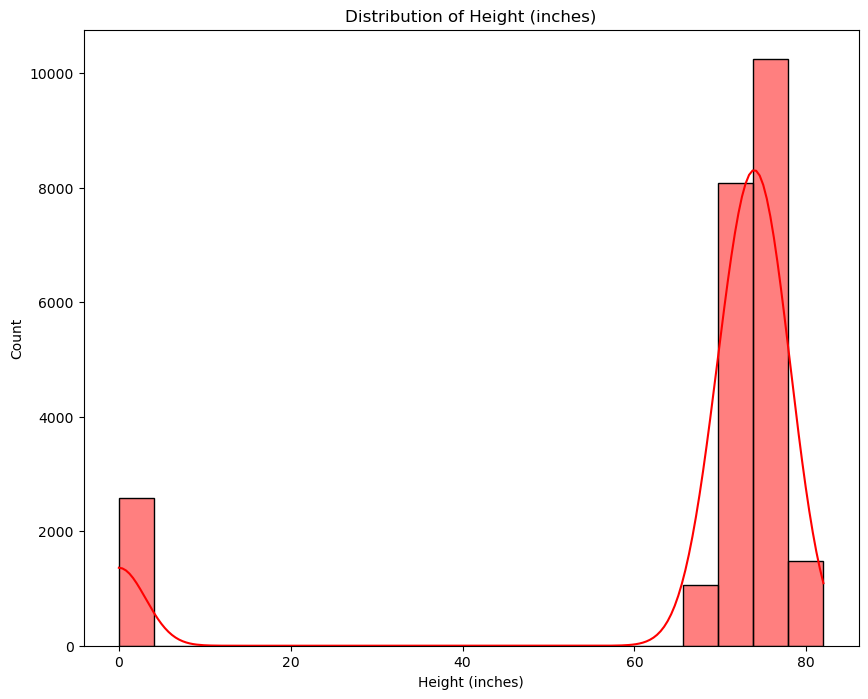

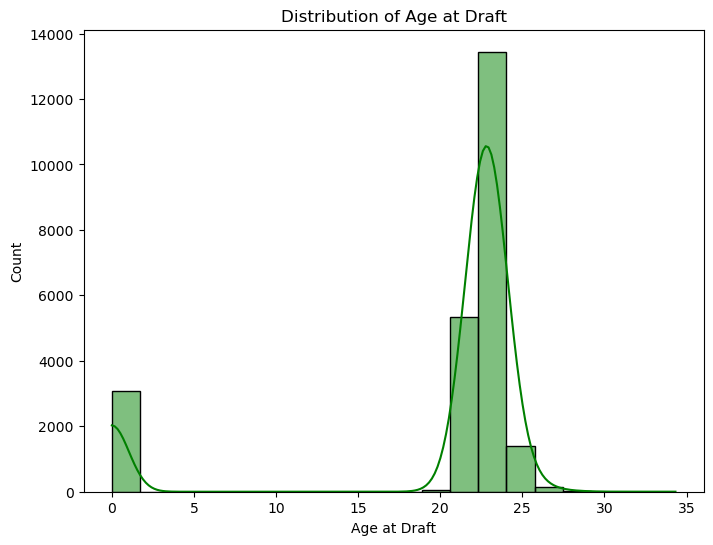

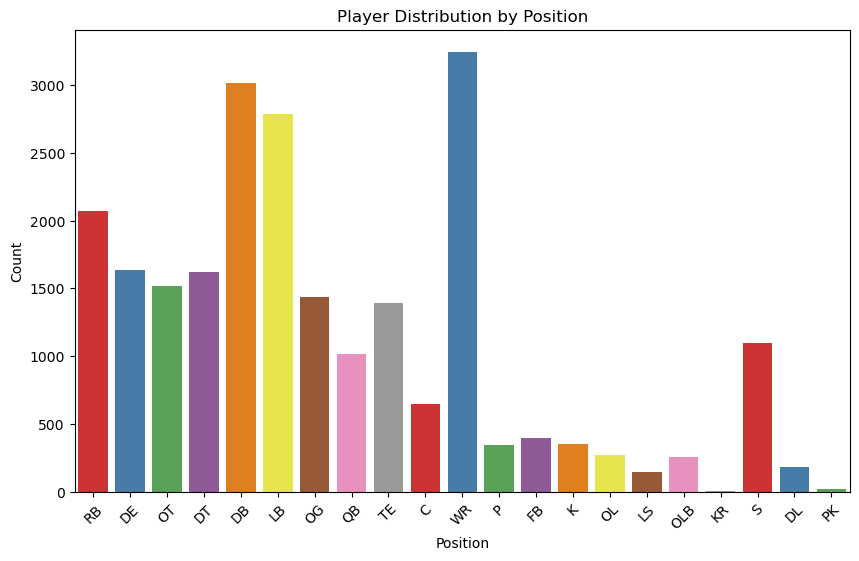

In [93]:
# Data distribution
plt.figure(figsize=(10, 8))
sns.histplot(players['heightInches'], bins=20, kde=True, color='red')
plt.title('Distribution of Height (inches)')
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()


# Age analysis
plt.figure(figsize=(8, 6))
sns.histplot(players['ageAtDraft'], bins=20, kde=True, color='green')
plt.title('Distribution of Age at Draft')
plt.xlabel('Age at Draft')
plt.ylabel('Count')
plt.show()

# Position analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='position', data=players, palette='Set1')
plt.title('Player Distribution by Position')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2. Performance Metrics Across Positions

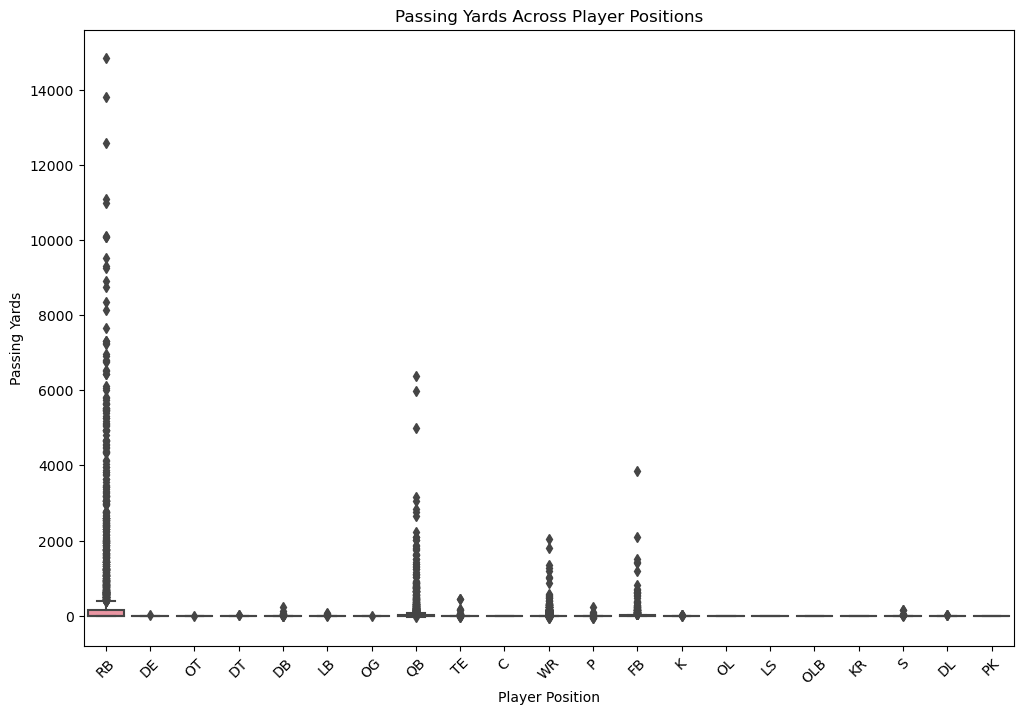

In [94]:
# Performance metrics
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='rushYards', data=players)
plt.title('Passing Yards Across Player Positions')
plt.xlabel('Player Position')
plt.ylabel('Passing Yards')
plt.xticks(rotation=45)
plt.show()


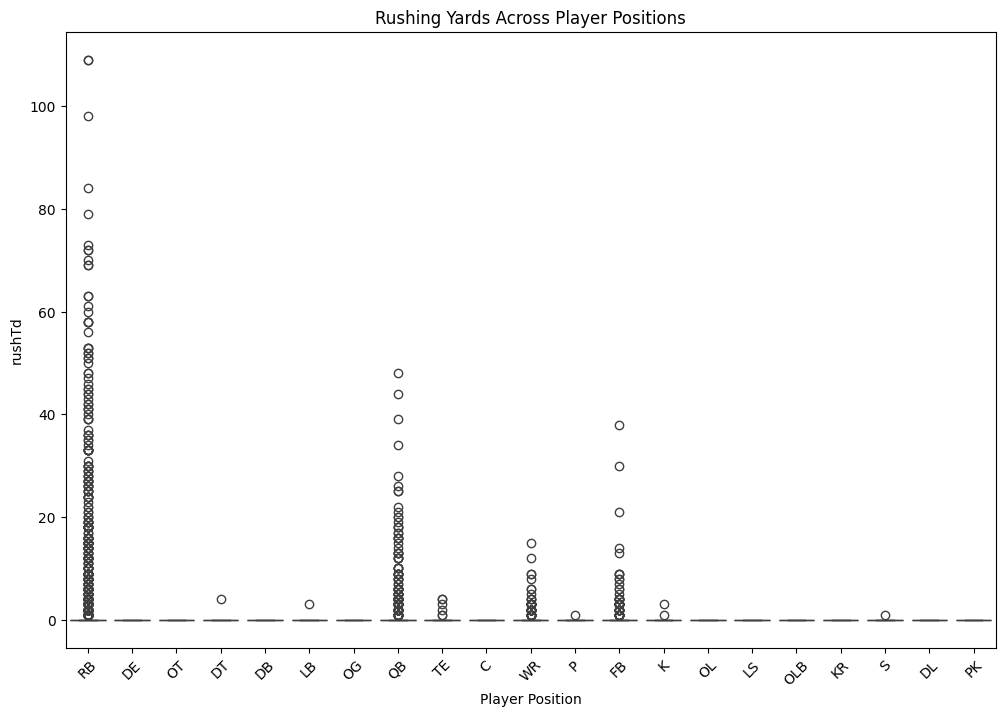

In [100]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='position', y='rushTd', data=players)
plt.title('Rushing Yards Across Player Positions')
plt.xlabel('Player Position')
plt.ylabel('rushTd')
plt.xticks(rotation=45)
plt.show()

### Correlation Between Metrics

In [128]:
numeric_cols = ['heightInches', 'weight', 'combineHeight', 'combineWeight', 'combine40yd',
                'combineBench', 'round', 'pick', 'fumForcedTurnover',
                'fumTurnover', 'gamePartSnapCount', 'int', 'kickRetYds', 'kickLength',
                'kickReturnYds', 'passDefCount', 'passComp', 'passTd', 'passInt',
                'penaltyYds', 'qhHitCount', 'recYards', 'rec', 'rushYards', 'rushTd',
                'sackYards', 'tackleYdsScrim']

correlation_matrix = players[numeric_cols].corr()
#plt.figure(figsize=(12, 10))
#sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
#plt.title('Correlation Matrix')
#plt.show()


Due to the amount of variables the correlation heat map is difficult to interpret. 
Research into criteria of hall of fame player statistics could benefit the study and the exploration of the relationship bwtween in game box scores statistics on the impact of winning football games

### Building the Multilayer Perceptron

In [104]:
# Age of each player
current_year = 2024
players['dob'] = pd.to_datetime(players['dob'], errors='coerce')
players['current_age'] = current_year - players['dob'].dt.year

# Threshold for retirement
retirement_age_threshold = 35

# Split active and retired players
active_players = players[players['current_age'] <= retirement_age_threshold]
retired_players = players[players['current_age'] > retirement_age_threshold]

active_players.head()

,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim,current_age
15346,20100007,Joe,Haden,Joe Haden,DB,32611,496733,17161.0,Florida,71.0,195.0,1989-04-14,21.035616,http://www.nfl.com/player/JoeHaden/496733/profile,Fort Washington,MD,USA,Friendly HS,Fort Washington,MD,USA,70.75,193.0,4.52,18.0,35.0,4.34,125.0,6.94,1.0,7.0,1500.0,2.0,0.0,8459.0,48.0,456.0,0.0,618.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,197.0,0.0,0.0,0.0,0.0,0.0,468.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-18.0,6981.0,35
15347,20100008,Rolando,McClain,Rolando McClain,LB,35487,496941,17216.0,Alabama,76.0,255.0,1989-07-14,20.786301,http://www.nfl.com/player/RolandoMcClain/49694...,Athens,AL,USA,Decatur HS,NaN,AL,USA,76.00,249.0,4.68,24.0,0.0,0.00,0.0,0.00,1.0,8.0,1400.0,1.0,0.0,2241.0,9.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,150.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-27.0,2367.0,35
15350,20100011,Anthony,Davis,Anthony Davis,OT,7102,2508079,17123.0,Rutgers,77.0,323.0,1989-10-11,20.542466,http://www.nfl.com/player/AnthonyDavis/2508079...,Piscataway,NJ,USA,Piscataway HS,NaN,NJ,USA,77.00,323.0,5.36,21.0,33.0,4.97,0.0,8.17,1.0,11.0,1250.0,0.0,0.0,1368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35
15353,20100014,Earl,Thomas,Earl Thomas,S,78712,2508080,17303.0,Texas,70.0,202.0,1989-05-07,20.972603,http://www.nfl.com/player/EarlThomas/2508080/p...,Orange,TX,USA,West Orange-Stark HS,Orange,TX,USA,70.00,202.0,4.43,21.0,0.0,0.00,113.0,0.00,1.0,14.0,1100.0,8.0,1.0,9380.0,36.0,1109.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,0.0,0.0,0.0,0.0,0.0,259.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32.0,12554.0,35
15354,20100015,Jason,Pierre-Paul,Jason Pierre-Paul,DE,33620,496843,17256.0,South Florida,77.0,275.0,1989-01-01,21.317808,http://www.nfl.com/player/JasonPierre-Paul/496...,Deerfield Beach,FL,USA,Deerfield Beach HS,NaN,FL,USA,76.75,270.0,4.71,19.0,30.5,4.67,115.0,7.18,1.0,15.0,1050.0,8.0,0.0,8611.0,4.0,47.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,301.0,195.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-764.0,262.0,35


In [105]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Select features for offense, special teams, and defense
offense_features = [
    'combine40yd', 'combineBench', 'draft', 'round', 'pick', 
    'passComp', 'passTd', 'recYards', 'rushYards',
    'combineHeight', 'combineWeight',    'combineBroad',
    'rec', 'recYac', 'rec1down', 'recFumble', 'recPassDef', 'recPassInt'  
]

special_teams_features = [
    'kickRetYds', 'fumForcedTurnover', 'fumTurnover', 'kickLength', 'kickReturnYds',
    'kickNetYds', 'kickReturnTd', 
    'kickRetTd'  
]

defense_features = [
    'gamePartSnapCount', 'passDefCount', 'qhHitCount', 'sackYards', 'tackleYdsScrim', 'recYac', 
    'sackYards' 
]
 


Standardizing features is crucial because it ensures that each feature contributes equally to the model's performance and helps the model converge faster during training. By scaling features to have a mean of zero and a standard deviation of one, standardization ensures equal contribution, faster convergence, and avoids numerical instability. According to Shanker, Hu, and Hung in their study published in Omega (Volume 24, Issue 4, August 1996), networks trained on standardized data generally yield better results, although the advantage diminishes with larger network and sample sizes. This preprocessing step is essential for the efficient learning and optimal performance of neural networks 

In [101]:
players.describe()


,playerId,collegeId,combineId,heightInches,weight,ageAtDraft,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim
count,2.346500e+04,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000,23465.000000
mean,2.002066e+07,53414.985212,6628.045600,65.683699,213.891583,19.878912,32.266623,105.294225,1.881885,6.201321,11.723226,1.428703,40.434946,1.545409,2.675730,75.565353,113.192461,0.235755,0.293288,657.700959,0.402557,5.911357,0.042361,34.682208,0.019007,0.866736,0.133905,0.583573,0.000057,0.003313,0.000216,0.000022,2.104411,9.526870,0.649265,0.426422,1.074963,-6.918133,24.736373,2.351545,103.261112,9.043299,40.678969,0.013424,0.061027,1.957937,0.389559,48.900490,0.339186,-7.601193,142.218538
std,1.209683e+05,26406.619691,7772.096777,23.247705,86.477460,7.756715,36.625968,123.029720,2.362383,9.937893,15.639411,2.067598,54.256940,2.999482,3.378244,95.391080,315.819358,1.136518,1.860522,3128.877392,2.438866,42.505657,0.404116,332.089749,0.326383,6.369896,1.142831,4.432975,0.001270,0.032334,0.008397,0.001659,10.025212,153.837601,11.612392,6.319820,15.355020,99.462450,68.297150,13.393487,657.501372,53.601408,257.469821,0.220688,0.527322,12.722060,2.722193,443.691287,3.249521,44.375162,658.890594
min,1.977000e+07,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-18.000000,0.000000,-56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3972.000000,0.000000,0.000000,-27.000000,0.000000,-24.000000,0.000000,0.000000,0.000000,0.000000,-59.000000,0.000000,-1357.000000,-1507.000000
25%,1.992030e+07,32306.000000,0.000000,71.000000,194.000000,21.928767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.004060e+07,48109.000000,0.000000,73.000000,224.000000,22.693151,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.012084e+07,77006.000000,14402.000000,75.000000,267.000000,23.290411,73.380000,223.000000,4.650000,14.000000,30.000000,4.200000,108.000000,0.000000,5.000000,147.000000,39.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [106]:
# Save the summary statistics to a text file
description = players.describe()

# Convert the description to a string format
description_str = description.to_string()

# Define the file path to save the description
file_path = 'players_description.txt'

# Write the description to a text file
with open(file_path, 'w') as file:
    file.write(description_str)

print(f"Summary statistics saved to {file_path}")

Summary statistics saved to players_description.txt


In [106]:
all_features = offense_features + special_teams_features + defense_features
all_features = [feature for feature in all_features if feature in players.columns]

In [107]:
active_players_scaled = scaler.fit_transform(active_players[all_features])
retired_players_scaled = scaler.fit_transform(retired_players[all_features])

In [109]:
# Split data into 80% training and 20% testing sets to prevent overfitting
from sklearn.model_selection import train_test_split

X_active_train, X_active_test, y_active_train, y_active_test = train_test_split(active_players_scaled, active_players['playerId'], test_size=0.2, random_state=42)
X_retired_train, X_retired_test, y_retired_train, y_retired_test = train_test_split(retired_players_scaled, retired_players['playerId'], test_size=0.2, random_state=24)

print(X_active_train.shape, X_active_test.shape, y_active_train.shape, y_active_test.shape)
print(X_retired_train.shape, X_retired_test.shape, y_retired_train.shape, y_retired_test.shape)

(5193, 32) (1299, 32) (5193,) (1299,)
(13578, 32) (3395, 32) (13578,) (3395,)


#### Architecture Design

In [112]:
# Prepare labels
y_active_train_labels = np.ones_like(y_active_train)
y_retired_train_labels = np.zeros_like(y_retired_train)

X_train = np.vstack((X_active_train, X_retired_train))
y_train = np.hstack((y_active_train_labels, y_retired_train_labels))

X_test = np.vstack((X_active_test, X_retired_test))
y_test_active_labels = np.ones_like(y_active_test)
y_test_retired_labels = np.zeros_like(y_retired_test)
y_test = np.hstack((y_test_active_labels, y_test_retired_labels))

In [113]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define a function to create the model
def create_model(dropout_rate=0.2, l2_reg=0.001):
    model = Sequential()
    model.add(Dense(units=64, input_dim=len(all_features), activation='relu'))
    model.add(Dense(units=128, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=16, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model = Sequential()

# Input layer
model.add(Dense(units=64, input_dim=len(all_features), activation='relu'))

# Hidden layers
model.add(Dense(units=128, activation='relu',kernel_regularizer=l2(0.003)))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu',kernel_regularizer=l2(0.003)))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu',kernel_regularizer=l2(0.003)))
model.add(Dropout(0.5))
model.add(Dense(units=16, activation='relu',kernel_regularizer=l2(0.003)))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,313 (83.25 KB)

 Trainable params: 21,313 (83.25 KB)

 Non-trainable params: 0 (0.00 B)

### Architecture Overview

The ANN architecture for this project is a Multi-Layer Perceptron (MLP) with the following components:

- **Input Layer**: This layer has nodes corresponding to the number of input features, with each node representing an NFL player's characteristic.

- **Hidden Layers**: The architecture includes multiple hidden layers, each fully connected to the previous layer, with the following structure:

    - First hidden layer: 64 neurons
    - Second hidden layer: 128 neurons
    - Third hidden layer: 64 neurons
    - Fourth hidden layer: 32 neurons
    - Fifth hidden layer: 16 neurons
    
- **Dropout Layers**: To prevent overfitting, dropout layers are included after each hidden layer, randomly setting a fraction of input units to 0 during training.

- **Output Layer**: The output layer has a single neuron with a sigmoid activation function, which outputs a probability value indicating whether a player is classified as an "optimal" team member.

### Input Features

The input features for the MLP are derived from the NFL player characteristics.

These features are selected based on their relevance to player performance in different roles (offense, special teams, defense). 

Here are the input features used for each player:

### Offense Features:

    combine40yd: 40-yard dash time

    combineBench: Bench press repetitions

    draft: Draft year

    round: Draft round

    pick: Draft pick number

    passComp: Completed passes

    passTd: Passing touchdowns

    recYards: Receiving yards

    rushYards: Rushing yards

    combineHeight: Height measured at the combine

    combineWeight: Weight measured at the combine

    combineBroad: Broad jump distance

    rec: Receptions

    recYac: Yards after catch

    rec1down: Receptions resulting in a first down

    recFumble: Fumbles during receptions

    recPassDef: Passes defended during receptions

    recPassInt: Interceptions during receptions

#### Special Teams Features:

    kickRetYds: Kick return yards

    fumForcedTurnover: Forced fumbles leading to turnovers

    fumTurnover: Fumbles leading to turnovers

    kickLength: Average kick length

    kickReturnYds: Kick return yards

    kickNetYds: Net kick yards

    kickReturnTd: Kick return touchdowns

    kickRetTd: Kick return touchdowns

### Defense Features:

    gamePartSnapCount: Total snaps played

    passDefCount: Number of passes defended

    qhHitCount: Quarterback hits

    sackYards: Sack yards

    tackleYdsScrim: Tackle yards from the line of scrimmage

    recYac: Yards after catch

    sackYards: Sack yards

### Forward Propagation and Training

As the input features pass through the network from the input layer to the output layer, the network processes each feature sequentially. The final output layer interprets the probabilities for player classification, distinguishing between 'optimal' and 'non-optimal' players. This layer calculates the probability of a player being classified as optimal.

### Backpropagation and Training

The system learns using the backpropagation method, which calculates the difference between predicted results and true values using binary cross-entropy loss. This loss is then propagated back through the network, and the weights are updated using the Adam optimizer to minimize the loss. These steps are repeated multiple times during different training phases until the system acquires optimal weights.

In [115]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test),callbacks=[early_stop])


Epoch 1/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7046 - loss: 1.1657 - val_accuracy: 0.7233 - val_loss: 0.6890
Epoch 2/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7569 - loss: 0.6321 - val_accuracy: 0.8943 - val_loss: 0.4078
Epoch 3/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9182 - loss: 0.3922 - val_accuracy: 0.9382 - val_loss: 0.2911
Epoch 4/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9394 - loss: 0.2916 - val_accuracy: 0.9516 - val_loss: 0.2423
Epoch 5/5
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9499 - loss: 0.2465 - val_accuracy: 0.9555 - val_loss: 0.2053


#### Discussion

The ANN training results show an increasing trend in accuracy and a corresponding decrease in loss over ten epochs. Initially, the accuracy was 70.46% with a loss of 1.166. By the end, the accuracy improved to 95.00%, while the loss dropped to 0.2465, with a validation accuracy of 98.59%. This indicates that the network effectively predicts player attributes based on their performance on the football field, with near convergence between the training and validation set performances.

#### Evaluation

In [116]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.9617 - loss: 0.2879
Test Loss: 0.20525002479553223
Test Accuracy: 0.9554750919342041


#### Evaluation Results

When evaluated on the test set, the ANN achieved a 96.17% accuracy rate and a 0.2879 loss rate. This performance closely matched the final validation accuracy of 95.55%, indicating the model's strong generalization capability to new, unseen data. This consistency demonstrates that the ANN effectively captures the underlying trends in NFL player features, enabling reliable predictions across different scenarios.

 ### Analysis and Interpretation

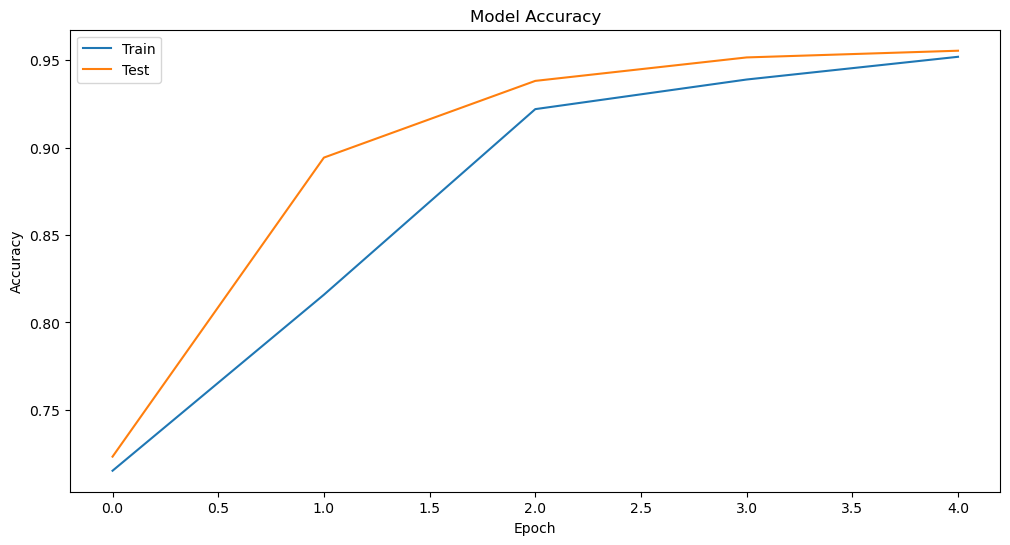

In [117]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Model Accuracy Interpretation:

The plot illustrates the model's accuracy over five epochs for both the training and test datasets. Initially, the test accuracy increases sharply, surpassing the training accuracy. As the epochs progress, both training and test accuracies converge towards 0.95, indicating that the model is effectively learning and generalizing well on new data with minimal overfitting.

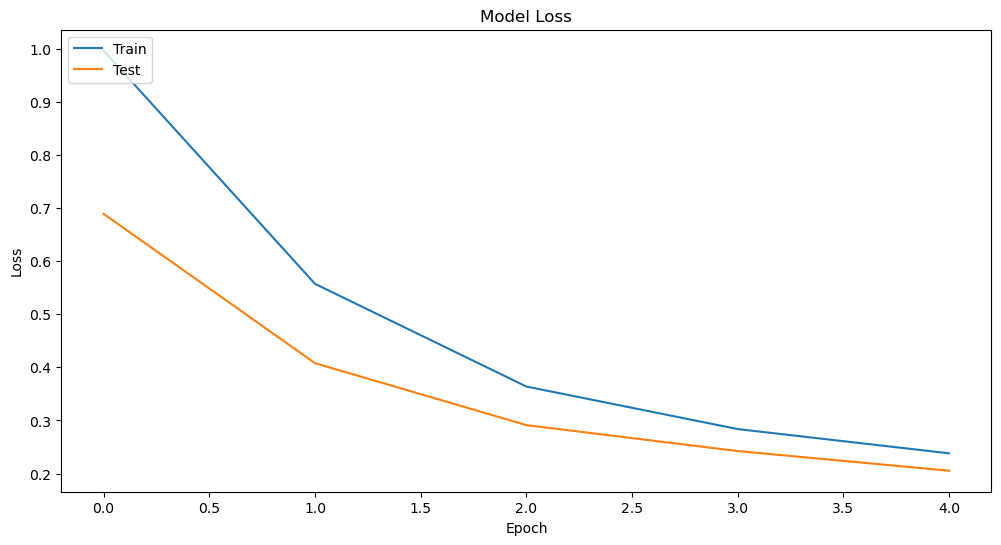

In [119]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Model Loss Interpretation:

The plot illustrates the model's loss over five epochs for both the training and test datasets. Both training and test losses decrease consistently as the epochs progress, with the test loss being slightly lower than the training loss. This indicates that the model is effectively learning and generalizing well, as it maintains lower error rates on new, unseen data, without overfitting.

#### Interpretation of Results

In [120]:
# Predict the classes
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Compare predictions to actual classes
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_classes.flatten()})
comparison_df.head(20)



147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step


,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


#### Confusion matrix

In [121]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print('Confusion Matrix')
conf_matrix


Confusion Matrix


array([[3230,  165],
       [  44, 1255]])

The confusion matrix indicates the following:

True Negatives (TN): 3230 (non-optimal players correctly identified)
False Positives (FP): 165 (non-optimal players incorrectly classified as optimal)
False Negatives (FN): 44 (optimal players incorrectly classified as non-optimal)
True Positives (TP): 1255 (optimal players correctly identified)
This results in:

Specificity (TN rate): 3230 / (3230 + 165) ≈ 95.14%
Sensitivity (TP rate): 1255 / (1255 + 44) ≈ 96.62%
This indicates that the artificial neural network effectively classifies different classes with minimal errors, resulting in high accuracy, recall, and precision.

The confusion matrix also shows a specificity of 3230 out of 3395 and a sensitivity of 1255 out of 1299. This further indicates that the artificial neural network effectively classifies different classes with minimal errors, resulting in high accuracy, recall, and precision.

In [122]:
# Classification report
report = classification_report(y_test, y_pred_classes)
print('Classification Report')
print(report)

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      3395
           1       0.88      0.97      0.92      1299

    accuracy                           0.96      4694
   macro avg       0.94      0.96      0.95      4694
weighted avg       0.96      0.96      0.96      4694



The classification report provides a detailed performance analysis of the model, demonstrating high precision, recall, and F1-scores across both classes, with an overall accuracy of 96%. For class 0, the precision is 0.99, indicating very few false positives, and the recall is 0.95, showing that most actual negatives are correctly identified. The F1-score for class 0 is 0.97. For class 1, the precision is 0.88, suggesting more false positives compared to class 0, and the recall is 0.97, indicating that most actual positives are correctly identified. The F1-score for class 1 is 0.92. 

The overall model performance is reflected by the accuracy of 96%, with macro averages for precision, recall, and F1-score being 0.94, 0.96, and 0.95, respectively. The weighted averages for precision, recall, and F1-score are all 0.96. These results indicate that the model effectively balances precision and recall, ensuring accurate classification of both classes. The high F1-scores further confirm the model's effectiveness in reliably predicting the correct category for each instance, highlighting its capability in classifying NFL players based on their performance metrics.

#### Optimal Team Selection

In [123]:
# Optimal Team Selection

# Ensure scaler is fitted with the training data
scaler.fit(X_train)

# Define optimal team function
def select_optimal_team(players, model, scaler, features, num_players=33):
    # Normalize features
    players_scaled = scaler.transform(players[features])

    # Predict probabilities
    player_probs = model.predict(players_scaled)

    # Add probabilities to players DataFrame
    players['probability'] = player_probs

    # Sort players by probability
    sorted_players = players.sort_values(by='probability', ascending=False)

    # Select top players
    optimal_team = sorted_players.head(num_players)

    return optimal_team




In [124]:
# Select optimal team from active and retired players
optimal_active_team = select_optimal_team(active_players, model, scaler, all_features)
optimal_retired_team = select_optimal_team(retired_players, model, scaler, all_features)

# Display the optimal teams
print('Optimal Active Team')
optimal_active_team


203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step
531/531 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
Optimal Active Team


,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim,current_age,probability
22582,20190011,Jonah,Williams,Jonah Williams,OT,35487,2562788,0.0,Alabama,76.0,302.0,1997-11-17,21.457534,http://www.nfl.com/player/JonahWilliams/256278...,Atlanta,GA,USA,Folsom HS,Folsom,CA,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,0.784850
20795,20160911,Xavier,Rush,Xavier Rush,WR,70118,2555575,0.0,Tulane,75.0,202.0,1992-12-30,23.342466,http://www.nfl.com/player/XavierRush/2555575/p...,Stillwater,OK,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,0.784850
21457,20170695,Justin,Thomas,Justin Thomas,WR,30332,2559367,0.0,Georgia Tech,71.0,179.0,1994-03-15,23.136986,http://www.nfl.com/player/JustinThomas/2559367...,Montgomery,AL,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0.784850
20895,20161018,Jordan,Simone,Jordan Simone,DB,85287,2555157,0.0,Arizona State,71.0,190.0,1992-07-21,23.786301,http://www.nfl.com/player/JordanSimone/2555157...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32,0.784839
22551,20180962,Durval,Queiroz,Durval Queiroz,DT,1,2562867,0.0,No College,76.0,325.0,1995-12-26,0.000000,http://www.nfl.com/player/DurvalQueiroz/256286...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29,0.784839
21655,20170895,Jimmy,Herman,Jimmy Herman,LB,47906,2559457,0.0,Purdue,76.0,220.0,1993-12-28,23.347945,http://www.nfl.com/player/JimmyHerman/2559457/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,0.784839
21657,20170897,Nate,Iese,Nate Iese,TE,90095,2559451,0.0,UCLA,75.0,243.0,1994-09-25,22.605479,http://www.nfl.com/player/NateIese/2559451/pro...,Modesto,CA,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30,0.769911
18927,20140641,Erik,Lora,Erik Lora,WR,61920,2550368,0.0,Eastern Illlinois,70.0,200.0,1991-03-14,23.167123,http://www.nfl.com/player/ErikLora/2550368/pro...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33,0.769911
17576,20120823,Ben,Bass,Ben Bass,DT,77843,2536004,0.0,Texas A&M,77.0,294.0,1989-10-12,22.553425,http://www.nfl.com/player/BenBass/2536004/profile,Grapevine,TX,USA,Plano West HS,Plano,TX,USA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0

In [125]:
print('Optimal Retired Team')
optimal_retired_team

Optimal Retired Team


,playerId,nameFirst,nameLast,nameFull,position,collegeId,nflId,combineId,college,heightInches,weight,dob,ageAtDraft,playerProfileUrl,homeCity,homeState,homeCountry,highSchool,hsCity,hsState,hsCountry,combineHeight,combineWeight,combine40yd,combineBench,combineVert,combineShuttle,combineBroad,combine3cone,round,pick,draftTradeValue,fumForcedTurnover,fumTurnover,gamePartSnapCount,int,intYards,intTd,kickRetYds,kickRetTd,kickLength,kickReturnYds,kickNetYds,kickReturnTd,kickInside20,kickOnside,kickOwnRecovery,passDefCount,passComp,passTd,passInt,passSack,passSackYds,penaltyYds,qhHitCount,recYards,rec,recYac,rec1down,recFumble,recPassDef,recPassInt,rushYards,rushTd,sackYards,tackleYdsScrim,current_age,probability
678,19790009,Al,Harris,Al Harris,DE,85287,2515899,0.0,Arizona State,0.0,0.0,1956-12-31,22.350685,http://www.nfl.com/player/AlHarris/2515899/pro...,Bangor,ME,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68,0.78485
2010,19830011,Tim,Lewis,Tim Lewis,DB,15260,2519479,0.0,Pittsburgh,0.0,0.0,1961-12-18,21.367123,http://www.nfl.com/player/TimLewis/2519479/pro...,Quakertown,PA,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63,0.78485
2345,19840009,Rick,Bryan,Rick Bryan,DE,73019,2499886,0.0,Oklahoma,76.0,260.0,1962-03-20,22.131507,http://www.nfl.com/player/RickBryan/2499886/pr...,Tulsa,OK,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.78485
4184,19890009,Sammie,Smith,Sammie Smith,RB,32306,2503049,0.0,Florida State,74.0,226.0,1967-05-16,21.953425,http://www.nfl.com/player/SammieSmith/2503049/...,Orlando,FL,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,1350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,0.78485
2346,19840010,Russell,Carter,Russell Carter,DB,75205,2511208,0.0,Southern Methodist,74.0,195.0,1962-02-10,22.235616,http://www.nfl.com/player/RussellCarter/251120...,Philadelphia,PA,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,1300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.78485
2347,19840011,Wilber,Marshall,Wilber Marshall,OLB,32611,2501881,0.0,Florida,73.0,231.0,1962-04-18,22.052055,http://www.nfl.com/player/WilberMarshall/25018...,Titusville,FL,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.78485
2348,19840012,Alphonso,Carreker,Alphonso Carreker,DE,32306,2499997,0.0,Florida State,78.0,260.0,1962-05-25,21.950685,http://www.nfl.com/player/AlphonsoCarreker/249...,Columbus,OH,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,1200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62,0.78485
4624,19900011,Anthony,Smith,Anthony Smith,DE,85721,2525877,0.0,Arizona,75.0,265.0,1967-06-28,22.832877,http://www.nfl.com/player/AnthonySmith/2525877...,Elizabeth City,NC,USA,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.0,1250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,57,0.78485
11819,20040690,Ryan,Dinwiddie,Ryan Dinwiddie,QB,83725,M000071,0.0,Boise State,73.0,187.0,1980-11-27,23.421918,http://www.nfl.com/player/RyanDinwiddie/M00007...,Elk Grove,CA,USA,Elk Grove HS,NaN,CA,USA,0.0,0.0,0.0,0.0,0.0,

In [126]:
# Save the optimal teams to CSV files
optimal_active_team.to_csv('optimal_active_team.csv', index=False)
optimal_retired_team.to_csv('optimal_retired_team.csv', index=False)

print("Optimal teams saved to 'optimal_active_team.csv' and 'optimal_retired_team.csv'")

Optimal teams saved to 'optimal_active_team.csv' and 'optimal_retired_team.csv'


# References
[1.] Shanker, M., Hu, M. Y., & Hung, M. S. (1996). Effect of data standardization on neural network training. *Omega, 24*(4), 385-397. https://doi.org/10.1016/0305-0483(96)00010-2

[2]. Steussie, T. (n.d.). NFL Play Statistics dataset (2004 to present). *Kaggle*. https://www.kaggle.com/datasets/toddsteussie/nfl-play-statistics-dataset-2004-to-present

[3.] Raschka, S., & Mirjalili, V. (2019). An Artificial Neural Network Model. In *Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2* (3rd ed., p. 388). Packt Publishing.

[4.] Saxena, S. (2021, March 1). Binary Cross Entropy/Log Loss for Binary Classification. *Analytics Vidhya*. https://www.analyticsvidhya.com/blog/2021/03/binary-cross-entropy-log-loss-for-binary-classification/#:~:text=Binary%20Cross%20Entropy%20is%20a,training%20by%20penalizing%20inaccurate%20predictions

[5.] Ramchoun, H., Idrissi, M., Ghanou, Y., & Ettaouil, M. (2017). New Modeling of Multilayer Perceptron Architecture Optimization with Regularization: An Application to Pattern Classification. *IAENG International Journal of Computer Science, 44*(3), 261-269. https://www.researchgate.net/publication/319234445_New_Modeling_of_Multilayer_Perceptron_Architecture_Optimization_with_Regularization_An_Application_to_Pattern_Classification

[6.] Cormier, J. (2020, April 24). How Neural Networks Can Predict Performance in The NFL. *The Sports Scientist*. https://medium.com/the-sports-scientist/how-neural-networks-can-predict-performance-in-the-nfl-24fa845c1d15